<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0
print("x_train.shape : " , X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape :  (60000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [6]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8589 - loss: 0.4826 - val_accuracy: 0.9559 - val_loss: 0.1479
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9572 - loss: 0.1488 - val_accuracy: 0.9697 - val_loss: 0.1003
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9668 - loss: 0.1080 - val_accuracy: 0.9737 - val_loss: 0.0864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9732 - loss: 0.0871 - val_accuracy: 0.9759 - val_loss: 0.0801
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0707 - val_accuracy: 0.9758 - val_loss: 0.0765
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9798 - loss: 0.0628 - val_accuracy: 0.9774 - val_loss: 0.0719
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9825 - loss: 0.0552 - val_accuracy: 0.9780 - val_loss: 0.0748
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9833 - loss: 0.0503

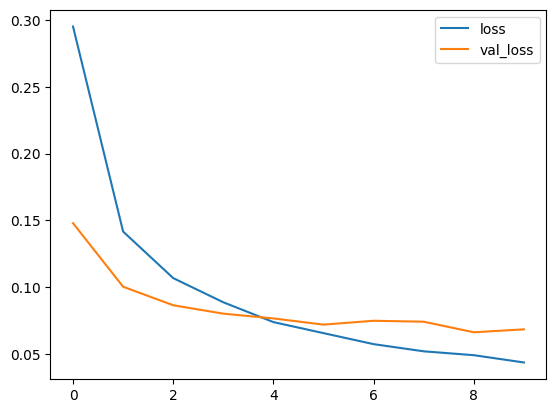

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

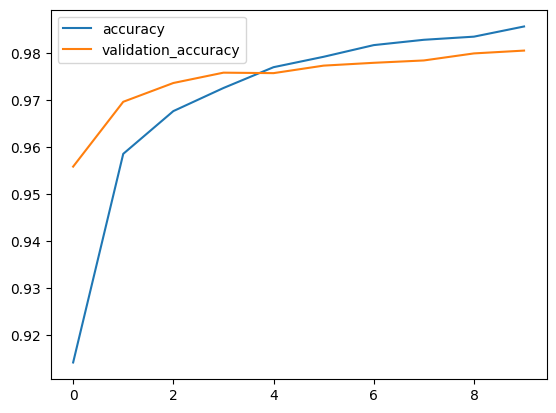

In [9]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix without normalization
[[ 973    0    1    1    0    0    2    1    1    1]
 [   0 1126    4    0    0    1    1    1    2    0]
 [   7    1 1011    3    1    0    1    6    2    0]
 [   2    0    2  990    0    5    0    5    3    3]
 [   3    0    1    0  961    0    2    3    1   11]
 [   3    0    0   10    3  868    3    2    3    0]
 [   5    3    2    1    4    2  939    0    2    0]
 [   1    2    9    3    1    0    0 1007    1    4]
 [   2    0    3    4    5    4    1    3  949    3]
 [   4    2    0    3    8    1    0    6    3  982]]


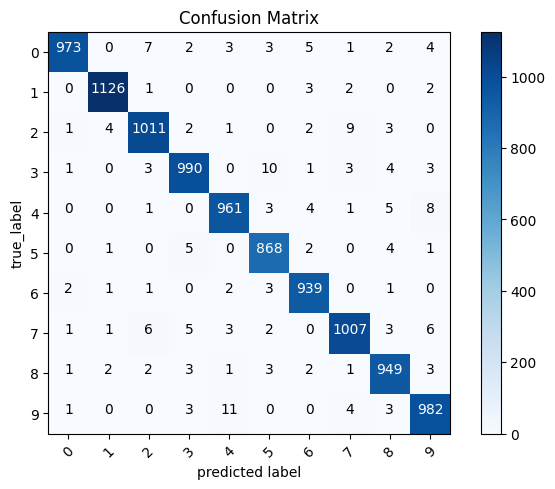

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap= plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix without normalization')
    print(cm)

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(i,j,format(cm[i,j],fmt), horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel('true_label')
    plt.xlabel('predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))



Text(0.5, 1.0, 'True Label: 9, Predicted: 4')

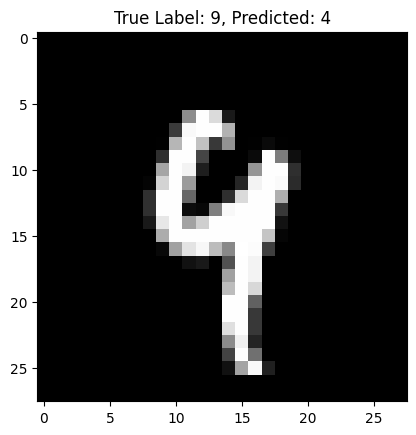

In [25]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True Label: %s, Predicted: %s" % (y_test[i], p_test[i]))
